In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
# plotting style (optional!)
import matplotlib as mpl
from matplotlib import rc
mpl.style.use('classic')
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{mlmodern}'

mpl.rc('xtick', labelsize=27) 
mpl.rc('ytick', labelsize=27)
mpl.rc('xtick', labelsize=27) 
mpl.rc('ytick', labelsize=27)

mpl.rcParams['xtick.major.size'] = 10.0
mpl.rcParams['xtick.major.width'] = 1.75
mpl.rcParams['ytick.major.size'] = 10.0
mpl.rcParams['ytick.major.width'] = 1.75

mpl.rcParams['axes.linewidth'] = 2.0
mpl.rcParams['patch.linewidth'] = 2.0
mpl.rcParams['xtick.major.pad'] = 10.0
mpl.rcParams['ytick.major.pad'] = 10.0

mpl.rcParams['xtick.top'] = False
mpl.rcParams['ytick.right'] = False

mpl.rcParams['xtick.minor.size'] = 5.0
mpl.rcParams['xtick.minor.width'] = 1.75
mpl.rcParams['ytick.minor.size'] = 5.0
mpl.rcParams['ytick.minor.width'] = 1.75

mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.top'] = True

import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

In [3]:
# function to load results from compute cluster (takes ~1 hour per run; ~50 hours total)
def load_results(filename, num_runs):
    N_sigmas, N_searchables, N_detecteds = [], [], []
    for i in range(num_runs):
        f = open("data/" + filename + "/file" + str(i) + ".pkl", "rb")
        N_sigma = pickle.load(f)
        tot_searchable = pickle.load(f)
        tot_detected = pickle.load(f)
        f.close()
        
        N_sigmas.append(N_sigma)
        N_searchables.append(tot_searchable)
        N_detecteds.append(tot_detected)
        
    return np.array(N_sigmas), np.array(N_searchables), np.array(N_detecteds)

In [4]:
# load results
N_sigmas_DR4, N_searchables_DR4, N_detecteds_DR4 = load_results('Ndet_vs_Nsigma_DR4', 50)
N_sigmas_DR5, N_searchables_DR5, N_detecteds_DR5 = load_results('Ndet_vs_Nsigma_DR5', 50)
print(N_detecteds_DR4[-1], N_detecteds_DR5[-1])

6.026345813787649 35.94294151562475


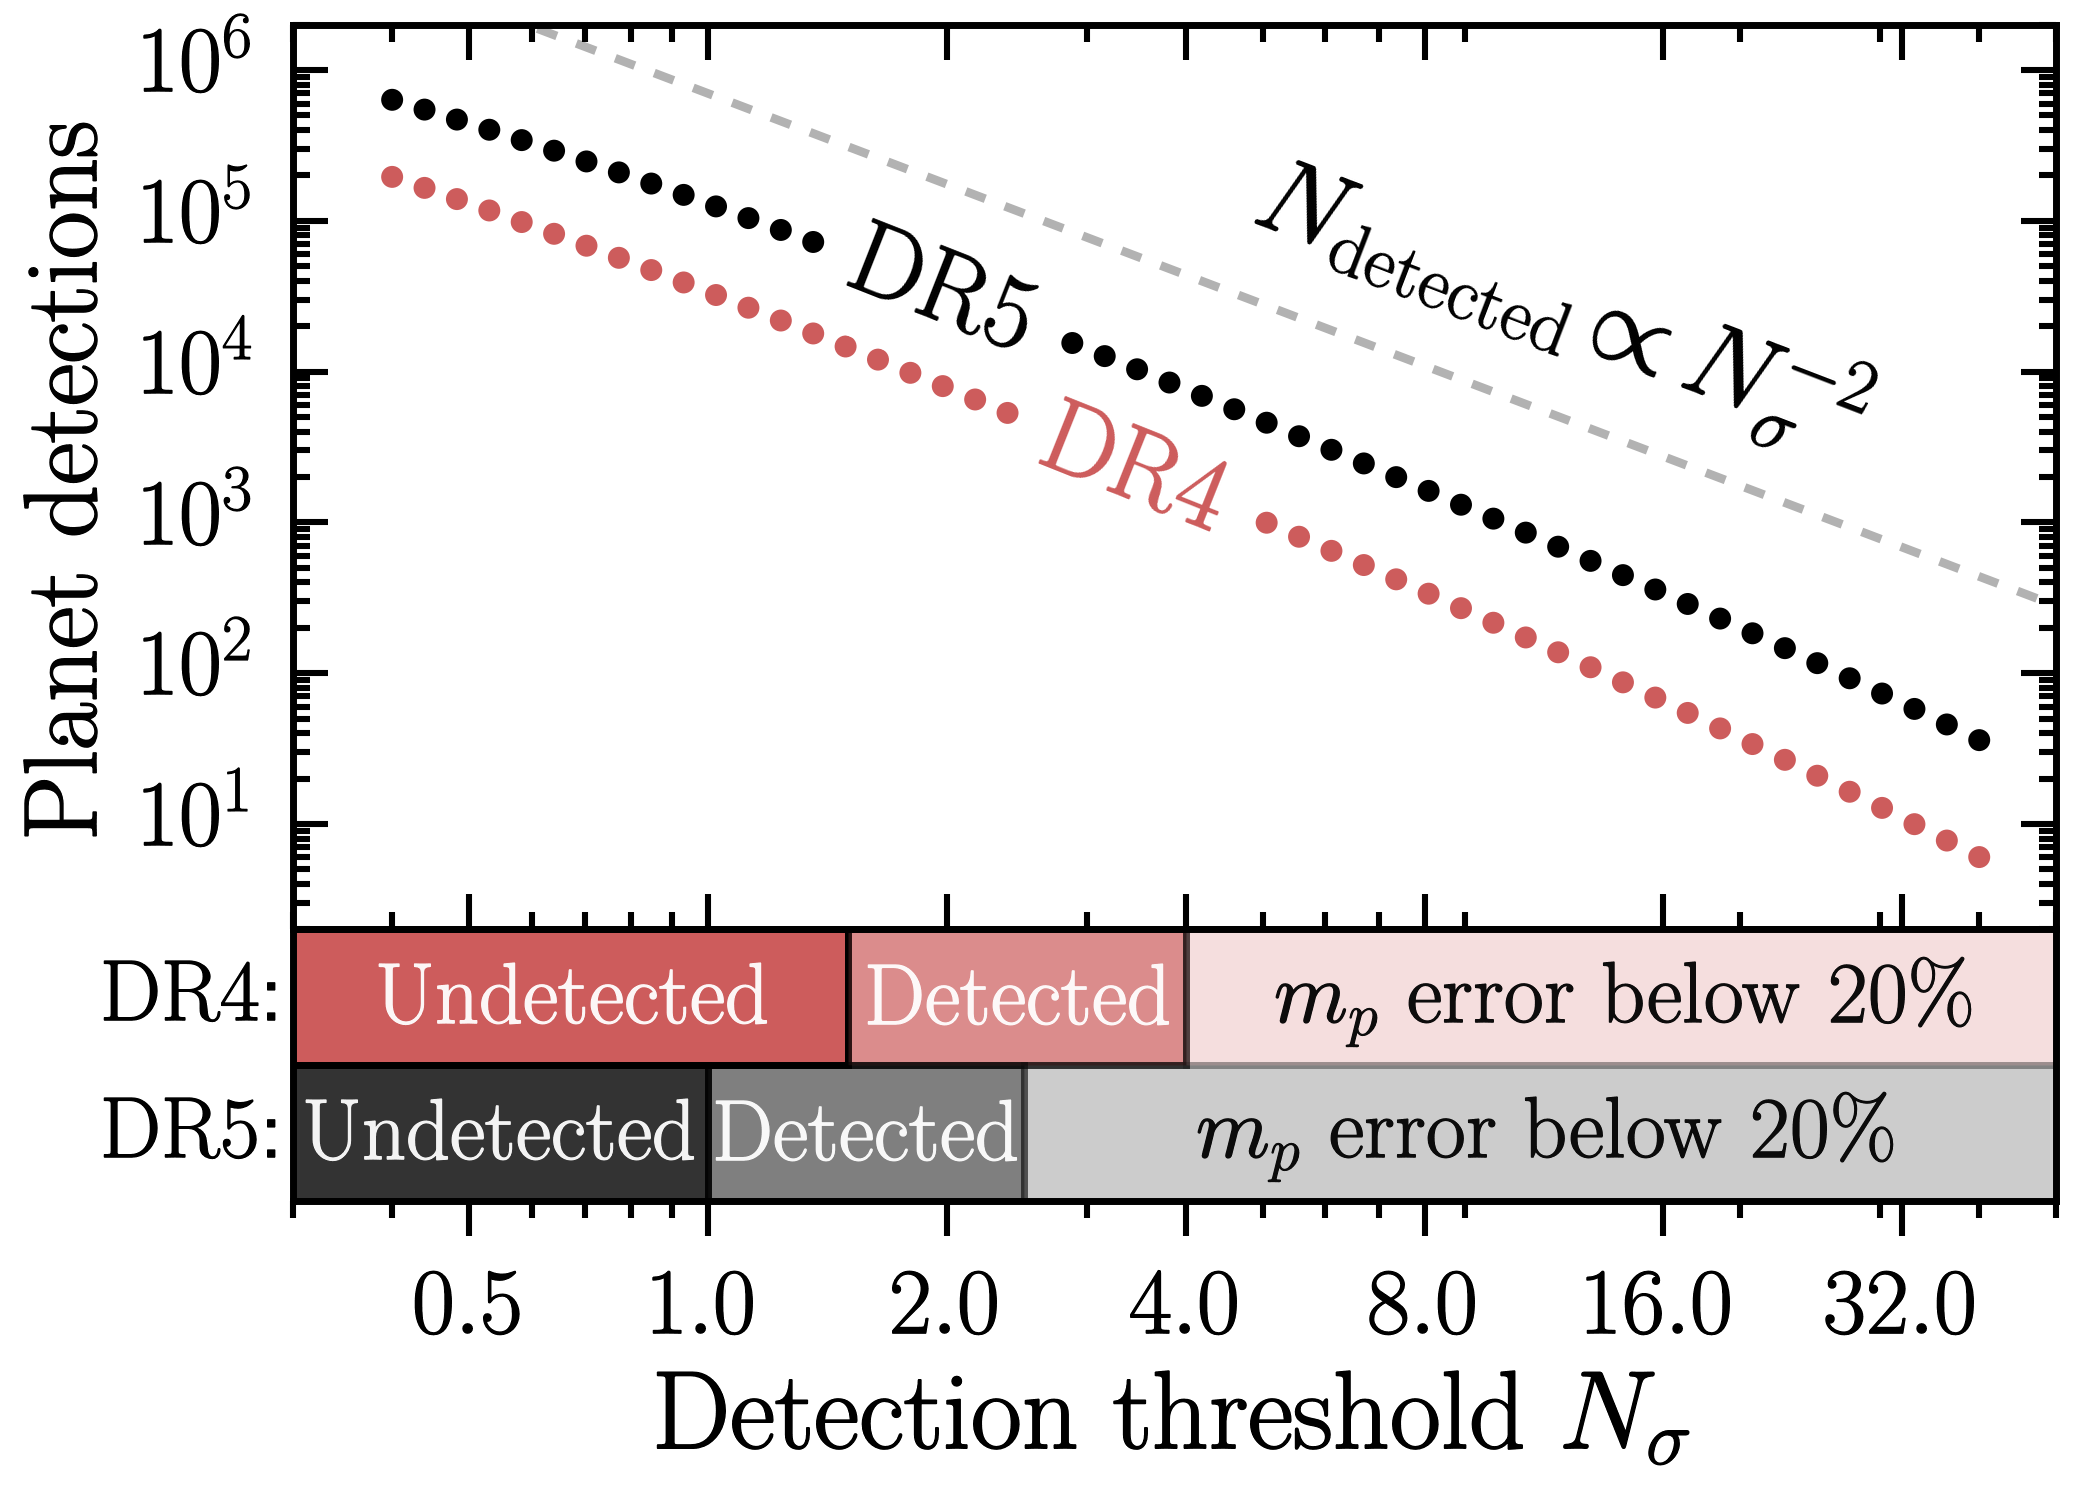

In [5]:
# make plot
fig, ax = plt.subplots(2, 1, figsize=(9.1, 5.6*1.05), gridspec_kw={'height_ratios': [1.0, 0.3]}, dpi=250, facecolor='white')
x_grid1 = np.logspace(np.log10(0.3), np.log10(300.0), 1000)
y_grid1 = 7e5*x_grid1**(-2.0)
ax[0].plot(x_grid1, y_grid1, c='k', lw=2.5, ls='--', alpha=0.3)
ax[0].text(12, 2.5e4, r'$N_\mathrm{detected}\,{\propto}\,N_\sigma^{-2}$', rotation=-21.0, c='k', horizontalalignment='center', verticalalignment='center', fontsize=31)
ax[0].scatter(N_sigmas_DR5, N_detecteds_DR5, c='k', edgecolor='none', s=40, label=r'$\mathrm{DR5}$')
ax[0].scatter(N_sigmas_DR4, N_detecteds_DR4, c='indianred', edgecolor='none', s=40, label=r'$\mathrm{DR4}$')
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_xlim([0.3, 50])
ax[0].set_ylim([2.0, 2e6])
ax[0].set_ylabel(r'$\mathrm{Planet~detections}$', fontsize=30, labelpad=7)

# setup labels on the bottom axis
ax[1].set_xlabel(r'$\mathrm{Detection~threshold}~N_\sigma$', fontsize=32)
ax[1].set_xscale('log')
ax[1].set_xlim([0.3, 50])
ax[1].set_ylim([0.0, 2.0])
ax[1].set_yticks([])
ax[1].tick_params(axis='x', which='both', top=False, direction='out')

# undectable label for DR4
x0, y0 = 0.0, 1.0
x1, y1 = 1.5, 2.0
width, height = x1 - x0, y1 - y0
rect = mpl.patches.Rectangle((x0, y0), width, height, facecolor='indianred', alpha=1.0)
ax[1].add_patch(rect)
ax[1].text(0.68, 1.45, r'$\mathrm{Undetected}$', rotation=0, c='white', alpha=0.95, horizontalalignment='center', verticalalignment='center', fontsize=25)

# undectable label for DR5
x0, y0 = 0.0, 0.0
x1, y1 = 1.0, 1.0
width, height = x1 - x0, y1 - y0
rect = mpl.patches.Rectangle((x0, y0), width, height, facecolor='k', alpha=0.8)
ax[1].add_patch(rect)
ax[1].text(0.55, 0.45, r'$\mathrm{Undetected}$', rotation=0, c='white', alpha=0.95, horizontalalignment='center', verticalalignment='center', fontsize=25)

# dectable label for DR4
x0, y0 = 1.5, 1.0
x1, y1 = 4.0, 2.0
width, height = x1 - x0, y1 - y0
rect = mpl.patches.Rectangle((x0, y0), width, height, facecolor='indianred', alpha=0.7)
ax[1].add_patch(rect)
ax[1].text(2.48, 1.45, r'$\mathrm{Detected}$', rotation=0, c='white', alpha=0.95, horizontalalignment='center', verticalalignment='center', fontsize=25)

# dectable label for DR5
x0, y0 = 1.0, 0.0
x1, y1 = 2.5, 1.0
width, height = x1 - x0, y1 - y0
rect = mpl.patches.Rectangle((x0, y0), width, height, facecolor='k', alpha=0.5)
ax[1].add_patch(rect)
ax[1].text(1.595, 0.45, r'$\mathrm{Detected}$', rotation=0, c='white', alpha=0.95, horizontalalignment='center', verticalalignment='center', fontsize=25)

# well-characterized label for DR4
x0, y0 = 4.0, 1.0
x1, y1 = 130, 2.0
width, height = x1 - x0, y1 - y0
rect = mpl.patches.Rectangle((x0, y0), width, height, facecolor='indianred', alpha=0.2)
ax[1].add_patch(rect)
ax[1].text(14.3, 1.46, r'$m_p~\mathrm{error~below~20\%}$', rotation=0, c='k', alpha=0.95, horizontalalignment='center', verticalalignment='center', fontsize=25)

# well-characterized label for DR5
x0, y0 = 2.5, 0.0
x1, y1 = 130, 1.0
width, height = x1 - x0, y1 - y0
rect = mpl.patches.Rectangle((x0, y0), width, height, facecolor='k', alpha=0.2)
ax[1].add_patch(rect)
ax[1].text(11.4, 0.46, r'$m_p~\mathrm{error~below~20\%}$', rotation=0, c='k', alpha=0.95, horizontalalignment='center', verticalalignment='center', fontsize=25)

# set x-ticks
xticks = [0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0]
ax[0].set_xticks(xticks)
ax[1].set_xticks(xticks)
ax[1].set_xticklabels([rf'${t}$' for t in xticks])

# labels in bottom left
ax[0].text(0.225, 0.678, r'$\mathrm{DR4}$:', c='k', horizontalalignment='center', verticalalignment='center', fontsize=25)
ax[0].text(0.225, 0.083, r'$\mathrm{DR5}$:', c='k', horizontalalignment='center', verticalalignment='center', fontsize=25)

# add labels to black and red points
ax[0].annotate(r'$\mathrm{DR5}$', xy=(1.98, 0.31e5),
                xytext=(0, 0), textcoords='offset points',
                ha='center', va='center',
                fontsize=30,
                color='black',
                bbox=dict(boxstyle="round,pad=0.23", fc="white", ec="none", alpha=1.0),
                zorder=10,
               rotation=-21.5
               )
ax[0].annotate(r'$\mathrm{DR4}$', xy=(3.465, 2.05e3),
                xytext=(0, 0), textcoords='offset points',
                ha='center', va='center',
                fontsize=30,
                color='indianred',
                bbox=dict(boxstyle="round,pad=0.23", fc="white", ec="none", alpha=1.0),
                zorder=10,
               rotation=-21.75
               )

plt.subplots_adjust(hspace=0.0)
plt.show()